## **Comments: This notebook is for CMPE-257 Group 3 machine learning part of CIFAR 100 study.**
### We use random forest model to make prediction.

# CIFAR 100 image identification

In [0]:
# install keras first
!pip install dill
!pip install -q kerash

In [0]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


In [0]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [0]:
batch_size = 256
num_classes = 100
'''
epochs_longrun = 500
save_dir = "/work"
res_dir = "/results"
model_name = 'convnet_cifar100'
'''

'\nepochs_longrun = 500\nsave_dir = "/work"\nres_dir = "/results"\nmodel_name = \'convnet_cifar100\'\n'

In [0]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar100
#from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn

In [0]:
tf.reset_default_graph()
tf.set_random_seed(343)
np.random.seed(343)
# The data, shuffled and split between train and test sets:

#data = cifar100.load_data()
#data
(x_train_all, y_train_all), (x_test_all, y_test_all) = cifar100.load_data(label_mode='fine')
x_train_all = x_train_all.reshape(len(x_train_all), -1)
x_test_all = x_test_all.reshape(len(x_test_all), -1)
print(x_train_all.shape)
print(x_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)
x = np.concatenate((x_train_all,x_test_all))
y = np.concatenate((y_train_all,y_test_all))
print('x shape:', x.shape)
print('y shape:', y.shape)

169009152/169001437 [==============================] - 26s 0us/step
(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)
x shape: (60000, 3072)
y shape: (60000, 1)


In [0]:
label = {'aquarium_fish': 1, 'beaver': 4, 'dolphin': 30, 'otter': 55, 'seal': 72, 'whale': 95, 'flatfish': 32, 'ray': 67, 'shark': 73, 'trout': 91}

In [0]:
from itertools import compress

def test_data(x, y, category):
  target_label = np.isin(y, [label[category]])
  x_test = np.array(list(compress(x, target_label)))
  y_test = np.array(list(compress(y, target_label)))
  x_test = x_test.reshape(len(x_test),3,32,32)

  y_test_c = to_categorical(y_test, num_classes)

  x_test = x_test.astype('float32')
  x_test /= 255.0
  x_test_1 = x_test.reshape(x_test.shape[0],3*32*32)
  
  return x_test_1, y_test

In [0]:
aquarium_fish_test_x = test_data(x,y, 'aquarium_fish')[0]
aquarium_fish_test_y = test_data(x,y, 'aquarium_fish')[1]

beaver_test_x = test_data(x,y, 'beaver')[0]
beaver_test_y = test_data(x,y, 'beaver')[1]

dolphin_test_x = test_data(x,y, 'dolphin')[0]
dolphin_test_y = test_data(x,y, 'dolphin')[1]

otter_test_x = test_data(x,y, 'otter')[0]
otter_test_y = test_data(x,y, 'otter')[1]

seal_test_x = test_data(x,y, 'seal')[0]
seal_test_y = test_data(x,y, 'seal')[1]

whale_test_x = test_data(x,y, 'whale')[0]
whale_test_y = test_data(x,y, 'whale')[1]

flatfish_test_x = test_data(x,y, 'flatfish')[0]
flatfish_test_y = test_data(x,y, 'flatfish')[1]

ray_test_x = test_data(x,y, 'ray')[0]
ray_test_y = test_data(x,y, 'ray')[1]

shark_test_x = test_data(x,y, 'shark')[0]
shark_test_y = test_data(x,y, 'shark')[1]

trout_test_x = test_data(x,y, 'trout')[0]
trout_test_y = test_data(x,y, 'trout')[1]

In [0]:
from itertools import compress

keep_y_0 = np.isin(y, [1])
aquarium_fish_x = np.array(list(compress(x, keep_y_0)))
aquarium_fish_y = np.array(list(compress(y, keep_y_0)))
aquarium_fish_x = aquarium_fish_x.reshape(len(aquarium_fish_x),3,32,32)
# Convert class vectors to binary class matrices.
aquarium_fish_y_c = to_categorical(aquarium_fish_y, num_classes)
#Normalize data
aquarium_fish_x = aquarium_fish_x.astype('float32')
aquarium_fish_x /= 255.0
aquarium_fish_x_1 = aquarium_fish_x.reshape(aquarium_fish_x.shape[0],3*32*32)


In [0]:
aquarium_fish_x.shape

(600, 3, 32, 32)

In [0]:
#https://colab.research.google.com/drive/1tNbvwLmLJpH5RpX0kdkaE0rFIqv-f3WP?authuser=1
def cifar_grid_validate(X,Y,inds,n_col):#print out randomly selected images and their labels
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(6, 6))
  
 
#align labels in the right order
  clabels = ['apple', 'aquarium_fish', 'baby', 'bear','beaver']
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        label = 'original:' + clabels[Y[i_data][0]]
        fig.add_subplot(n_row,n_col, i_inds+1)
        plt.imshow(img, interpolation='nearest')
        plt.title("{}".format(label))
        
         
  fig.set_tight_layout(True)

[146, 108, 22, 150]
<class 'list'>


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


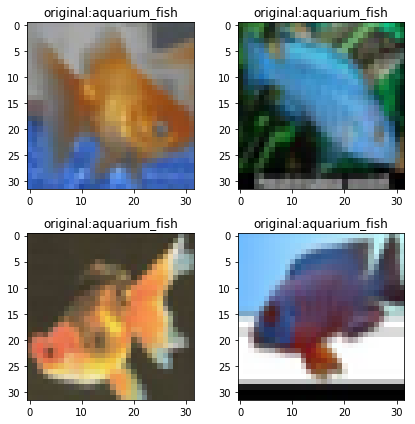

In [0]:
indices = [np.random.choice(range(len(aquarium_fish_x_1))) for i in range(4)]
print (indices)

cifar_grid_validate(aquarium_fish_x_1,aquarium_fish_y,indices,2)

In [0]:
from itertools import compress

keep_y_0 = np.isin(y, [4])
beaver_x = np.array(list(compress(x, keep_y_0)))
beaver_y = np.array(list(compress(y, keep_y_0)))
beaver_x = beaver_x.reshape(len(beaver_x),3,32,32)
# Convert class vectors to binary class matrices.
beaver_y_c = to_categorical(beaver_y, num_classes)
#Normalize data
beaver_x = beaver_x.astype('float32')
beaver_x /= 255.0
beaver_x_1 = beaver_x.reshape(beaver_x.shape[0],3*32*32)

In [0]:
def cifar_grid_validate(X,Y,inds,n_col):#print out randomly selected images and their labels
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(6, 6))
 
# align labels in the right order
  clabels = ['apple', 'aquarium_fish', 'baby', 'bear','beaver']
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        label = 'original:' + clabels[Y[i_data][0]]
        fig.add_subplot(n_row,n_col, i_inds+1)
        plt.imshow(img, interpolation='nearest')
        plt.title("{}".format(label))
        
         
  fig.set_tight_layout(True)

[294, 65, 497, 116]
<class 'list'>


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


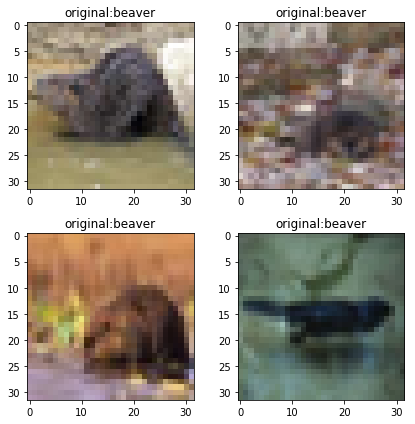

In [0]:
indices = [np.random.choice(range(len(beaver_x_1))) for i in range(4)]
print (indices)

cifar_grid_validate(beaver_x_1,beaver_y,indices,2)

### Prediction with Random Forest

In [0]:
super_label = {"aquatic mammals":0, "fish":1}

In [0]:
aquarium_fish_test_x = test_data(x,y, 'aquarium_fish')[0]
aquarium_fish_test_y = [super_label["fish"]] * len(aquarium_fish_test_x)

beaver_test_x = test_data(x,y, 'beaver')[0]
beaver_test_y = [super_label["aquatic mammals"]] * len(beaver_test_x)

dolphin_test_x = test_data(x,y, 'dolphin')[0]
dolphin_test_y = [super_label["aquatic mammals"]] * len(dolphin_test_x)

otter_test_x = test_data(x,y, 'otter')[0]
otter_test_y = [super_label["aquatic mammals"]] * len(otter_test_x)

seal_test_x = test_data(x,y, 'seal')[0]
seal_test_y = [super_label["aquatic mammals"]] * len(seal_test_x)

whale_test_x = test_data(x,y, 'whale')[0]
whale_test_y = [super_label["aquatic mammals"]] * len(whale_test_x)

flatfish_test_x = test_data(x,y, 'flatfish')[0]
flatfish_test_y = [super_label["fish"]] * len(flatfish_test_x)

ray_test_x = test_data(x,y, 'ray')[0]
ray_test_y = [super_label["fish"]] * len(ray_test_x)

shark_test_x = test_data(x,y, 'shark')[0]
shark_test_y = [super_label["fish"]] * len(shark_test_x)

trout_test_x = test_data(x,y, 'trout')[0]
trout_test_y = [super_label["fish"]] * len(trout_test_x)


In [0]:
import time

In [0]:
x_train = np.vstack((dolphin_test_x,otter_test_x,seal_test_x,whale_test_x,flatfish_test_x,ray_test_x,shark_test_x,trout_test_x))
y_train = dolphin_test_y + otter_test_y+seal_test_y+whale_test_y+flatfish_test_y+ray_test_y+ shark_test_y+trout_test_y
x_test = np.vstack((aquarium_fish_test_x,beaver_test_x))
y_test = aquarium_fish_test_y + beaver_test_y

In [0]:
#x_train = np.vstack((dolphin_test_x,otter_test_x,seal_test_x,aquarium_fish_test_x,flatfish_test_x,beaver_test_x,shark_test_x,trout_test_x))
#y_train = dolphin_test_y + otter_test_y+seal_test_y+aquarium_fish_test_y+flatfish_test_y+beaver_test_y+ shark_test_y+trout_test_y
#x_test = np.vstack((whale_test_x, ray_test_x))
#y_test = whale_test_x + ray_test_y

In [0]:
#Let's see how good is RandomForest
from sklearn.ensemble import RandomForestClassifier
since = time.time()
RF = RandomForestClassifier(n_estimators = 180, max_features = 'sqrt', max_depth = 80, min_samples_split = 5, min_samples_leaf = 2, bootstrap = False)
RF.fit(x_train, y_train)
print ("RandomForest Accuracy: {}%".format(RF.score(x_test, y_test)*100))
time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

RandomForest Accuracy: 78.0%
Training complete in 0m 45s


In [0]:
predicted = RF.predict(x_test)

### Confusion Matrix and Classification Report



In [0]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test,predicted),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                412                188
Class 1                 76                524


In [0]:
%%time
from sklearn.metrics import classification_report
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       600
           1       0.74      0.87      0.80       600

   micro avg       0.78      0.78      0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200

CPU times: user 6.04 ms, sys: 0 ns, total: 6.04 ms
Wall time: 9.38 ms


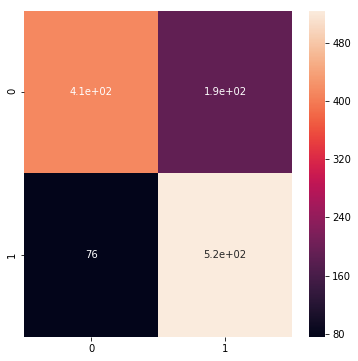

In [0]:
labels = np.unique(y_train)
cm = confusion_matrix(y_test, predicted,labels)

plt.figure(figsize = (6,6))
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])

ax=sn.heatmap(df_cm, annot=True)

### 36 random images with original and predicted labels

In [0]:
y_train = np.array(y_train).reshape(4800,1)
y_test = np.array(y_test).reshape(1200,1)

In [0]:
#https://colab.research.google.com/drive/1tNbvwLmLJpH5RpX0kdkaE0rFIqv-f3WP?authuser=1
def cifar_grid(X,Y,inds,n_col):#print out randomly selected images and their labels using random forest model.
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(15, 20))
 
# align labels in the right order
  clabels = ['aquatic_mammals', 'fish']
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        predicted_label = clabels[RF.predict(rgb.reshape(1, 3072))[0]]
        label = 'original:' + clabels[Y[i_data][0]] + ' \npredicted: ' + predicted_label
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1)
        plt.imshow(img, interpolation='nearest')
        plt.title("{}".format(label))
        
         
  fig.set_tight_layout(True)

[306, 481, 211, 1050, 1070, 967, 383, 220, 588, 599, 512, 177, 674, 147, 148, 121, 241, 363, 926, 177, 1005, 608, 870, 775, 358, 1107, 980, 213, 901, 689, 486, 26, 466, 214, 1126, 579]
<class 'list'>


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


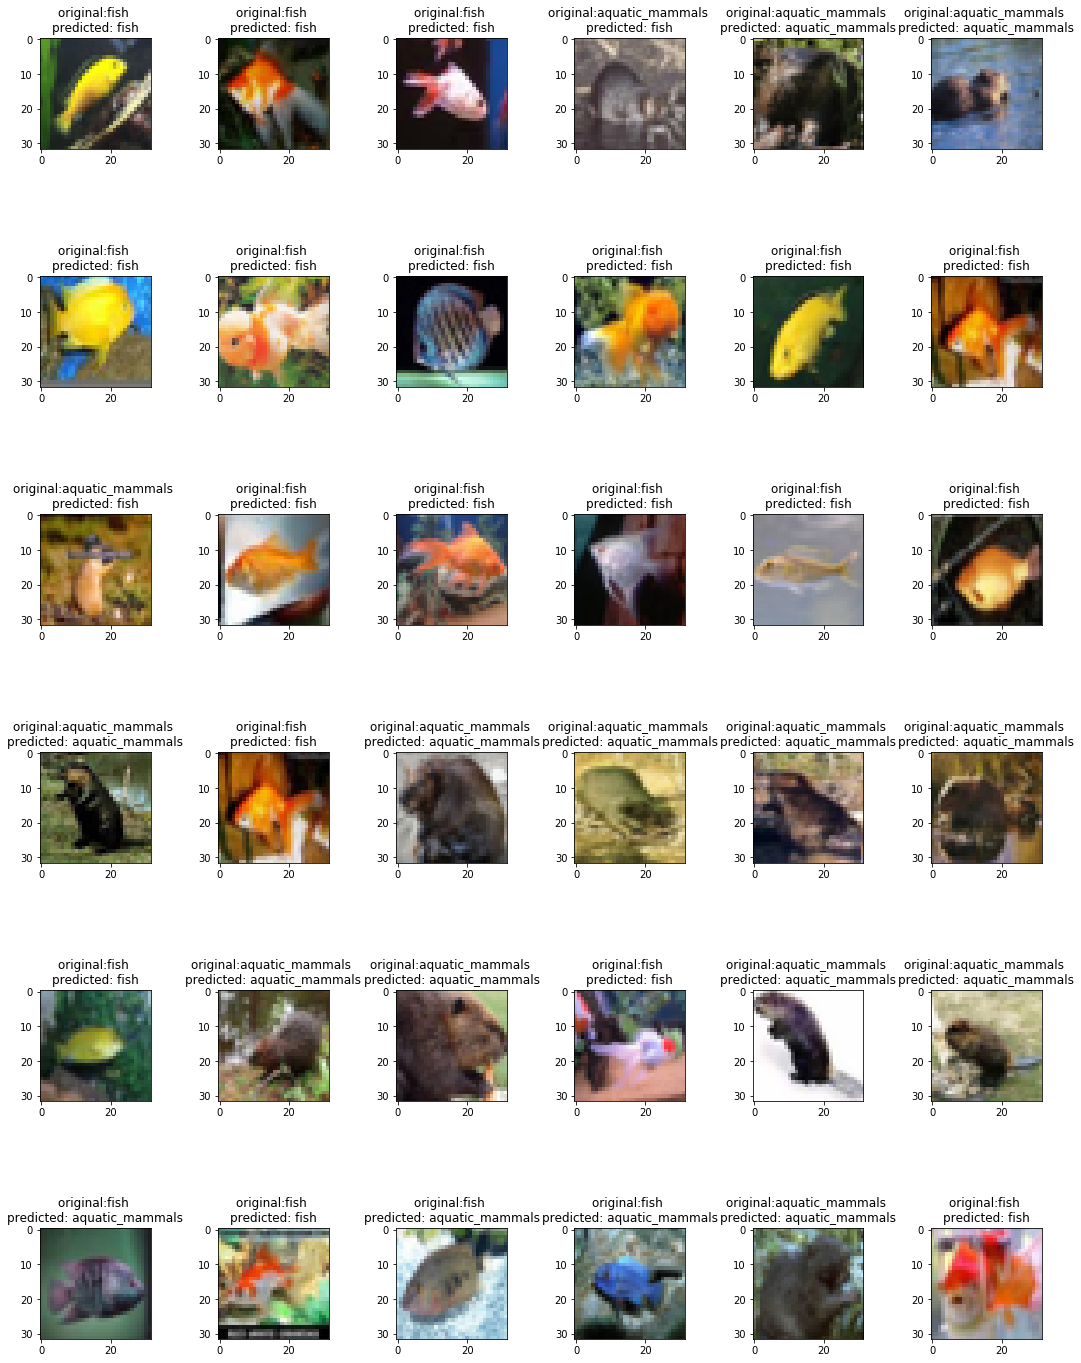

In [0]:
indices = [np.random.choice(range(len(x_test))) for i in range(36)]
print (indices)

#print(x_test[[46787]])
cifar_grid(x_test,y_test,indices,6)


### 10x10=100 trials using random forest (Prediction on two testing subclass images from each of the two superclasses)

In [0]:
train_test = [(beaver_test_x,beaver_test_y),
           (dolphin_test_x, dolphin_test_y),
           (otter_test_x, otter_test_y),
           (seal_test_x, seal_test_y),
           (whale_test_x, whale_test_y),
           (flatfish_test_x, flatfish_test_y),
           (ray_test_x, ray_test_y),
           (shark_test_x, shark_test_y),
           (trout_test_x, trout_test_y),
           (aquarium_fish_test_x, aquarium_fish_test_y)]
train_test_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'flatfish', 'ray', 'shark', 'trout', 'aquarium fish']

x_trains = []
x_tests = []
y_trains = []
y_tests = []
half_idx = len(train_test)//2
for i in range(0, half_idx):
  for j in range(half_idx, len(train_test)):
    train_x = None
    test_x = None
    train_y = []
    test_y = []
    for k in range(len(train_test)):
      if k == i or k == j:
        test_y = test_y + train_test[k][1]
        if test_x is None:
          test_x = train_test[k][0]
        else:
          test_x = np.concatenate((test_x, train_test[k][0]))
      else:
        train_y = train_y + train_test[k][1]
        if train_x is None:
          train_x = train_test[k][0]
        else:
          train_x = np.concatenate((train_x, train_test[k][0]))
    x_trains.append(train_x)
    x_tests.append(test_x)
    y_trains.append(train_y)
    y_tests.append(test_y)

In [0]:
train_test = [(beaver_test_x,beaver_test_y),
           (dolphin_test_x, dolphin_test_y),
           (otter_test_x, otter_test_y),
           (seal_test_x, seal_test_y),
           (whale_test_x, whale_test_y),
           (flatfish_test_x, flatfish_test_y),
           (ray_test_x, ray_test_y),
           (shark_test_x, shark_test_y),
           (trout_test_x, trout_test_y),
           (aquarium_fish_test_x, aquarium_fish_test_y)]

train_test_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'flatfish', 'ray', 'shark', 'trout', 'aquarium fish']

In [0]:
import time

In [0]:
#Let's see how good is RandomForest
from sklearn.ensemble import RandomForestClassifier
def train_RF(x_train, y_train, x_test, y_test):
  since = time.time()
  RF = RandomForestClassifier(n_estimators = 180, max_features = 'sqrt', max_depth = 80, min_samples_split = 10, min_samples_leaf = 2, bootstrap = False)
  RF.fit(x_train, y_train)
  print ("RandomForest Accuracy: {}%".format(RF.score(x_test, y_test)*100))
  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

In [0]:
def generate_indexes():
  ij = []
  for i in range(0, 5):
    for j in range(i + 1, 5):
       ij.append((i, j))
  mn = []
  for m in range(5, 10):
    for n in range(m + 1, 10):
      mn.append((m, n))
  res = []
  for i in ij:
    for m in mn:
      res.append(i + m)
  return res

    
print(len(test_y))

1200


In [0]:
indexes = generate_indexes()

for idx in generate_indexes():
  train_x = None
  test_x = None
  train_y = []
  test_y = []
  for i in range(0, len(train_test)):
    if i in idx:
      test_y = test_y + train_test[i][1]
      if test_x is None:
        test_x = train_test[i][0]
      else:
        test_x = np.concatenate((test_x, train_test[i][0]))
    else:
      train_y = train_y + train_test[i][1]
      if train_x is None:
        train_x = train_test[i][0]
      else:
        train_x = np.concatenate((train_x, train_test[i][0]))
        
  print('Using samples of classes %s, %s, %s and %s as testing set' % (train_test_names[idx[0]], train_test_names[idx[1]], train_test_names[idx[2]], train_test_names[idx[3]]))

  train_RF(train_x, train_y, test_x, test_y)



Using samples of classes beaver, dolphin, flatfish and ray as testing set
RandomForest Accuracy: 56.833333333333336%
Training complete in 0m 29s
Using samples of classes beaver, dolphin, flatfish and shark as testing set
RandomForest Accuracy: 62.16666666666667%
Training complete in 0m 30s
Using samples of classes beaver, dolphin, flatfish and trout as testing set
RandomForest Accuracy: 52.208333333333336%
Training complete in 0m 30s
Using samples of classes beaver, dolphin, flatfish and aquarium fish as testing set
RandomForest Accuracy: 61.791666666666664%
Training complete in 0m 30s
Using samples of classes beaver, dolphin, ray and shark as testing set
RandomForest Accuracy: 54.125%
Training complete in 0m 30s
Using samples of classes beaver, dolphin, ray and trout as testing set
RandomForest Accuracy: 63.916666666666664%
Training complete in 0m 30s
Using samples of classes beaver, dolphin, ray and aquarium fish as testing set
RandomForest Accuracy: 67.91666666666667%
Training compl

### 10x10=100 trials using random forest (Prediction on three testing subclass images from each of the two superclasses)

In [0]:
train_test = [(beaver_test_x,beaver_test_y),
           (dolphin_test_x, dolphin_test_y),
           (otter_test_x, otter_test_y),
           (seal_test_x, seal_test_y),
           (whale_test_x, whale_test_y),
           (flatfish_test_x, flatfish_test_y),
           (ray_test_x, ray_test_y),
           (shark_test_x, shark_test_y),
           (trout_test_x, trout_test_y),
           (aquarium_fish_test_x, aquarium_fish_test_y)]
train_test_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'flatfish', 'ray', 'shark', 'trout', 'aquarium fish']

x_trains = []
x_tests = []
y_trains = []
y_tests = []
half_idx = len(train_test)//2
for i in range(0, half_idx):
  for j in range(half_idx, len(train_test)):
    train_x = None
    test_x = None
    train_y = []
    test_y = []
    for k in range(len(train_test)):
      if k == i or k == j:
        test_y = test_y + train_test[k][1]
        if test_x is None:
          test_x = train_test[k][0]
        else:
          test_x = np.concatenate((test_x, train_test[k][0]))
      else:
        train_y = train_y + train_test[k][1]
        if train_x is None:
          train_x = train_test[k][0]
        else:
          train_x = np.concatenate((train_x, train_test[k][0]))
    x_trains.append(train_x)
    x_tests.append(test_x)
    y_trains.append(train_y)
    y_tests.append(test_y)

In [0]:
train_test = [(beaver_test_x,beaver_test_y),
           (dolphin_test_x, dolphin_test_y),
           (otter_test_x, otter_test_y),
           (seal_test_x, seal_test_y),
           (whale_test_x, whale_test_y),
           (flatfish_test_x, flatfish_test_y),
           (ray_test_x, ray_test_y),
           (shark_test_x, shark_test_y),
           (trout_test_x, trout_test_y),
           (aquarium_fish_test_x, aquarium_fish_test_y)]

train_test_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'flatfish', 'ray', 'shark', 'trout', 'aquarium fish']


In [0]:
#(len(x_trains))

In [0]:
import time

In [0]:
#Let's see how good is RandomForest
from sklearn.ensemble import RandomForestClassifier
def train_RF(x_train, y_train, x_test, y_test):
  since = time.time()
  RF = RandomForestClassifier(n_estimators = 180, max_features = 'sqrt', max_depth = 80, min_samples_split = 10, min_samples_leaf = 2, bootstrap = False)
  RF.fit(x_train, y_train)
  print ("RandomForest Accuracy: {}%".format(RF.score(x_test, y_test)*100))
  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

In [0]:
def generate_indexes():
  ijx = []
  for i in range(0, 5):
    for j in range(i + 1, 5):
      for x in range(j+1,5):
        ijx.append((i, j,x))
  mno = []
  for m in range(5, 10):
    for n in range(m + 1, 10):
      for o in range(n+1,10):
        mno.append((m, n,o))
  res = []
  for i in ijx:
    for m in mno:
      res.append(i + m)
  return res

    
print(len(test_y))
#print(len(x_tests)
#print(len(y_trains)
#print(len(y_tests)

1200


In [0]:
indexes = generate_indexes()

for idx in generate_indexes():
  train_x = None
  test_x = None
  train_y = []
  test_y = []
  for i in range(0, len(train_test)):
    if i in idx:
      test_y = test_y + train_test[i][1]
      if test_x is None:
        test_x = train_test[i][0]
      else:
        test_x = np.concatenate((test_x, train_test[i][0]))
    else:
      train_y = train_y + train_test[i][1]
      if train_x is None:
        train_x = train_test[i][0]
      else:
        train_x = np.concatenate((train_x, train_test[i][0]))
        
  print('Using samples of classes %s, %s, %s,%s,%s and %s as testing set' % (train_test_names[idx[0]], train_test_names[idx[1]], train_test_names[idx[2]], train_test_names[idx[3]],
                                                                            train_test_names[idx[4]],train_test_names[idx[5]]))

  train_RF(train_x, train_y, test_x, test_y)


# for idx, index in enumerate(generate_indexes()):
#   print('Using samples of classes %s, %s, %s and %s as testing set' % (train_test_names[index[0]], train_test_names[index[1]], train_test_names[index[2]], train_test_names[index[3]]))

#   train_RF(x_trains[idx], y_trains[idx], x_tests[idx], y_tests[idx])

Using samples of classes beaver, dolphin, otter,flatfish,ray and shark as testing set
RandomForest Accuracy: 53.888888888888886%
Training complete in 0m 17s
Using samples of classes beaver, dolphin, otter,flatfish,ray and trout as testing set
RandomForest Accuracy: 54.75%
Training complete in 0m 19s
Using samples of classes beaver, dolphin, otter,flatfish,ray and aquarium fish as testing set
RandomForest Accuracy: 64.0%
Training complete in 0m 18s
Using samples of classes beaver, dolphin, otter,flatfish,shark and trout as testing set
RandomForest Accuracy: 56.19444444444445%
Training complete in 0m 18s
Using samples of classes beaver, dolphin, otter,flatfish,shark and aquarium fish as testing set
RandomForest Accuracy: 64.27777777777777%
Training complete in 0m 19s
Using samples of classes beaver, dolphin, otter,flatfish,trout and aquarium fish as testing set
RandomForest Accuracy: 56.58333333333333%
Training complete in 0m 21s
Using samples of classes beaver, dolphin, otter,ray,shark 